# [Project 2] 증착 공정 가상 계측 모델링

---

## 프로젝트 목표
- 공정 데이터를 활용한 박막 두께를 예측
- 증착 두께를 예측에 영향을 미치는 요소들에 대한 데이터 분석 및 시각화

---

## 프로젝트 목차

1. **데이터 읽기:** 데이터를 불러오고 Dataframe 구조를 확인
<br>


2. **데이터 시각화:** 데이터를 시각화 하여 Outlier 확인<br>


3. **데이터 정제:** <br>
    3.1. 결측치 제거<br>
    3.2. 이상치 제거<br>


4. **데이터 전처리:** 머신러닝 모델에 필요한 입력값 형식으로 데이터 처리<br>
    4.1. x와 y로 분리<br>
    4.2. 데이터 정규화<br>
    4.3. 학습데이터, 평가데이터 분리


5. **딥러닝 모델 학습:** ANN 인공신경망을 활용한 회귀<br>
    5.1. 인공신경망 모델 생성	<br>
    5.2. 인공신경망 모델 학습	<br>
    5.3. 인공신경망 학습 결과 시각화
    5.4. 인공신경망 학습 결과 평가	


6. **평가 및 예측:** 학습된 모델을 바탕으로 평가 및 예측 수행<br>
    6.1. 인공신경망 예측 결과 복원<br>
    6.2. 인공신경망 가상 계측 및 시각화<br>



---

## 데이터 출처
- 명지대 증착 공정 연구실

---

## 프로젝트 개요

제조 분야의 디지털 트랜스포메이션이 진행되면서 제조 공정에서 일어나는 수많은 정보가 데이터로 정리되고 있습니다. 제조 공정의 가상 계측 분야는 이러한 데이터 바탕으로 구현되는 인공지능 기술로 기존 확률 기반의 계측보다 높은 효율을 내고 있습니다. 이러한 가상 계측 알고리즘은 공적 최적화, 특정 특성을 맞추기 위한 공정 Test iteration 을 줄일 수 있게 도움줍니다. 아직까지는 물리적 수식에 의해 만들어진 가상 계측 보다 성능이 떨어지지만, 데이터가 쌓이고 모델이 업그레이드 되면서 그 성능이 더욱 높아질것으로 예상 됩니다. 

이번 프로젝트에서는 실제 증착 장비에서 측정한 센서 데이터를 바탕으로 입력 데이터 (feature)에 따라 증착 두께을 예측해보는 회귀 모델을 구현합니다. 이를 활용하여 센서 데이터가 주어 졌을 때 실제 장비를 구동하지 않고 증착 두께를 예측 할수 있습니다. 또한, 어떤 센서가 두께에 중요한 역할을 하는지 알아봅시다.

---

## 1. 데이터 읽기

In [132]:
# 필요 모듈들을 import 합니다.

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import he_uniform

%matplotlib inline

In [134]:
# random seed를 고정합니다.

In [135]:
tf.random.set_seed(0)

In [136]:
# pandas를 사용하여 `data/Film_Thickness_Prediction_Data_(Recipe).csv` 데이터를 읽고 dataframe 형태로 저장해 봅시다.

In [137]:
data = pd.read_csv('data/Film_Thickness_Prediction_Data_(Recipe).csv')

In [138]:
# 30개의 행을 확인하세요. head()를 사용합니다. head() 안에 숫자를 넣을 수 있습니다. 

In [139]:
data.head(30)

,Power,Pressure,C3H6,N2,Thickness
0,250.0,1000,100.0,50,1023.0
1,250.0,800,80.0,50,701.0
2,230.0,800,80.0,40,758.0
3,230.0,1000,100.0,40,983.0
4,250.0,1000,80.0,40,1151.0
5,270.0,1000,80.0,50,1001.0
6,250.0,1000,60.0,50,1342.0
7,270.0,800,80.0,40,853.0
8,250.0,1000,60.0,30,1349.0
9,250.0,800,60.0,40,1007.0


In [140]:
# dataframe의 정보를 요약해서 출력하세요
# df.info()로 정보를 알 수 있습니다.
# df.shape로 몇 행과 몇 열로 되어있는지 알 수 있습니다. 처음이 행이고 두번째 열입니다.

In [141]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Power      28 non-null     float64
 1   Pressure   29 non-null     int64  
 2   C3H6       28 non-null     float64
 3   N2         29 non-null     int64  
 4   Thickness  28 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.3 KB


(29, 5)

In [142]:
# 수치형 변수의 데이터 정보를 요약하여 출력하세요
# df.describe()를 사용합니다.
# mean은 평균, std는 표준편차를 나타냅니다. 

In [143]:
data.describe()

,Power,Pressure,C3H6,N2,Thickness
count,28.000000,29.000000,28.000000,29.000000,28.000000
mean,264.642857,972.448276,77.250000,39.137931,1107.964286
std,78.621557,231.145221,19.736458,9.455626,337.750563
min,230.000000,1.000000,3.000000,5.000000,10.000000
25%,250.000000,1000.000000,75.000000,40.000000,986.000000
50%,250.000000,1000.000000,80.000000,40.000000,1099.500000
75%,255.000000,1000.000000,80.000000,40.000000,1336.750000
max,660.000000,1200.000000,100.000000,50.000000,1801.000000


## 2. 데이터 시각화

In [144]:
# 센서 데이터 0번~5번까지의 plot을 그려서 데이터를 시각화 해 봅니다.
# Plot의 제목을 센서명으로 지정합니다.

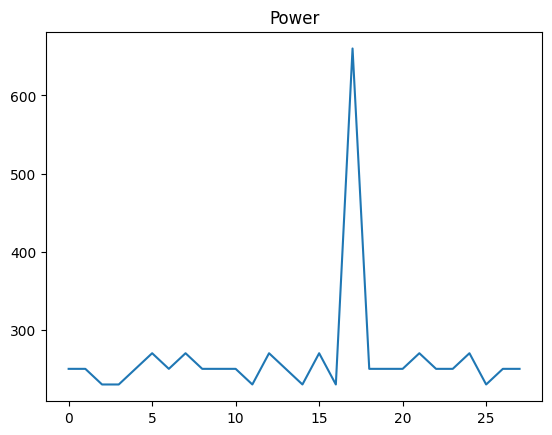

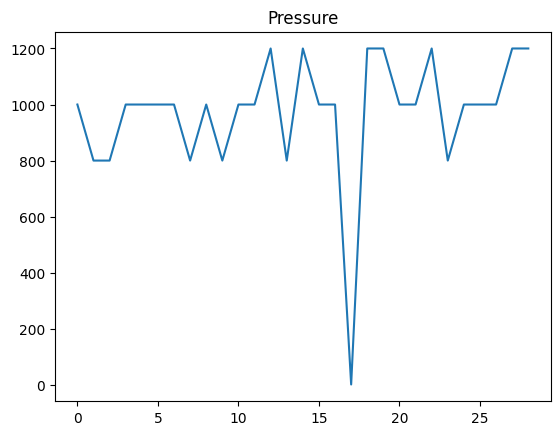

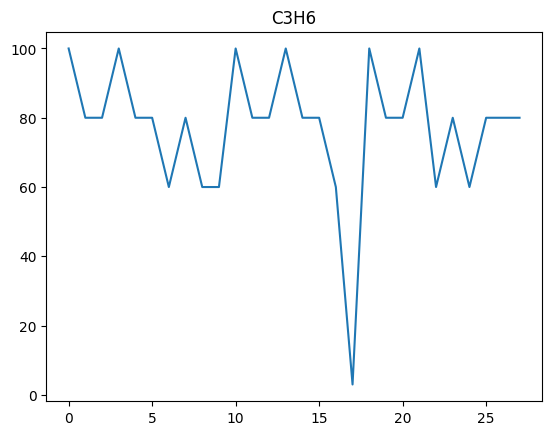

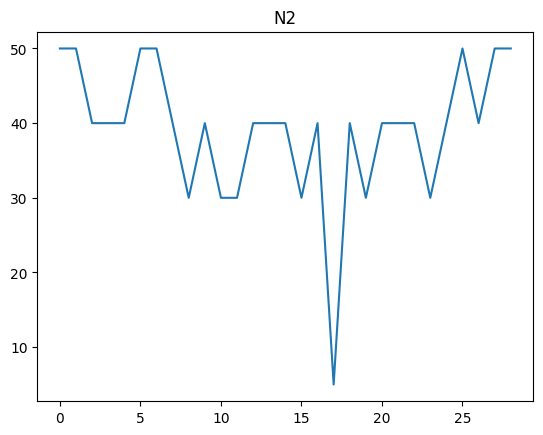

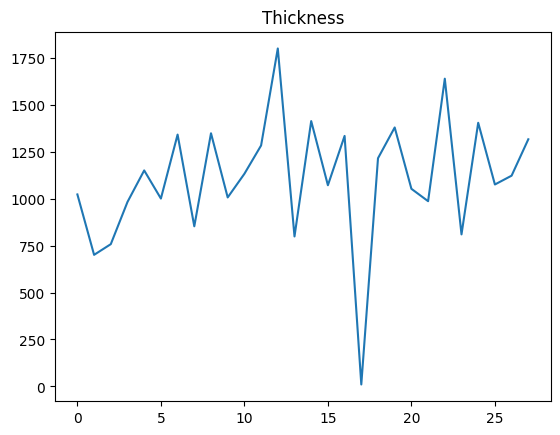

In [145]:
for i in range(0,5):
    plt.plot(data.iloc[:,i])
    plt.title(f"{data.columns[i]}")
    plt.show()

## 3. 데이터 정제

이번 데이터에서는 결측치 및 이상치 제거를 해 보겠습니다.

아래 코드를 수행하여 각 변수별로 결측값이 몇개가 있는지 확인합니다.

### 3.1 결측치 제거

In [146]:
#isnull을 사용하여 data에 N/A가 포함되어 있는지 확인 합니다.

In [147]:
data.isnull().sum()

Power        1
Pressure     0
C3H6         1
N2           0
Thickness    1
dtype: int64

In [148]:
# dropna는 결측치가 포함된 row, column을 지정하여 삭제 합니다.
# df.dropna(axis=None)
# Axis=0 : row 삭제, Axis=1 : column 삭제

In [149]:
data=data.dropna(axis=0)
data

,Power,Pressure,C3H6,N2,Thickness
0,250.0,1000,100.0,50,1023.0
1,250.0,800,80.0,50,701.0
2,230.0,800,80.0,40,758.0
3,230.0,1000,100.0,40,983.0
4,250.0,1000,80.0,40,1151.0
5,270.0,1000,80.0,50,1001.0
6,250.0,1000,60.0,50,1342.0
7,270.0,800,80.0,40,853.0
8,250.0,1000,60.0,30,1349.0
9,250.0,800,60.0,40,1007.0


### 3.2 이상치 제거

In [150]:
# outlier를 z-score를 산출하여 제거 합니다.
# z-score는 Z=(x-u)/std 의 수식으로 산출 됩니다.
# np.mean으로 u, np.std로 각 column의 값을 산출하고 input이 들어왔을때
# z score가 특정 z-score를 넘는 index를 return하는 함수를 생성하세요
# 예시
# def name(df, col, z-score)
#     return df[equation > z-score].index
#함수가 생성되었으면 drop함수를 이용하여 outlier 데이터를 삭제하세요

In [185]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

In [186]:
data=data.drop(index=outlier(data, 'Power', 3))
data

,Power,Pressure,C3H6,N2,Thickness
0,250.0,1000,100.0,50,1023.0
1,250.0,800,80.0,50,701.0
2,230.0,800,80.0,40,758.0
3,230.0,1000,100.0,40,983.0
4,250.0,1000,80.0,40,1151.0
5,270.0,1000,80.0,50,1001.0
6,250.0,1000,60.0,50,1342.0
7,270.0,800,80.0,40,853.0
8,250.0,1000,60.0,30,1349.0
9,250.0,800,60.0,40,1007.0


In [153]:
# 특정 index의 데이터가 삭제 되었음으로 indexing을 다시 설정 해 줍니다.
# index의 재설정은 reset_index를 사용합니다.
# reset_index(drop=True)로 설정해주지 않으면 기존에 갖고 있던 index가 하나의 column으로 추가됨

In [154]:
data.reset_index(drop=True)
data

,Power,Pressure,C3H6,N2,Thickness
0,250.0,1000,100.0,50,1023.0
1,250.0,800,80.0,50,701.0
2,230.0,800,80.0,40,758.0
3,230.0,1000,100.0,40,983.0
4,250.0,1000,80.0,40,1151.0
5,270.0,1000,80.0,50,1001.0
6,250.0,1000,60.0,50,1342.0
7,270.0,800,80.0,40,853.0
8,250.0,1000,60.0,30,1349.0
9,250.0,800,60.0,40,1007.0


## 4. 데이터 전처리

### 4.1 x, y데이터 분리

In [155]:
# 공정의 두께 (Thickness를 예측함하길 원함으로) Target(y)를 Thickness로 설정하고
# 나머지 센서 데이터를 Feature(x)로 설정

In [187]:
x = data.iloc[:,:4]
y = np.array(data.iloc[:,-1]).reshape(-1,1)
y

array([[1023.],
       [ 701.],
       [ 758.],
       [ 983.],
       [1151.],
       [1001.],
       [1342.],
       [ 853.],
       [1349.],
       [1007.],
       [1133.],
       [1284.],
       [1801.],
       [ 799.],
       [1414.],
       [1072.],
       [1335.],
       [1216.],
       [1380.],
       [1053.],
       [ 987.],
       [1640.],
       [ 810.],
       [1405.],
       [1076.],
       [1123.],
       [1317.]])

### 4.2 데이터 표준화

각 변수 마다의 스케일 차이를 맞추기 위하여 표준화를 수행합니다. 

표준화는 서로 다른 피처의 크기를 통일하기 위해서 크기를 변환해주는 개념입니다.

데이터의 피처를 0~1사이의 데이터로 변환하여 Feature간 scale차이를 없애 줍니다.

In [157]:
# MinMaxScaler 객체를 호출하고, fit_transform() 을 이용하여 Feature x를 표준화 해 보세요.
# regression에서는 Target도 같이 표준화 해야합니다.

In [158]:
input_scaler = MinMaxScaler()
output_scaler = MinMaxScaler()
x_s = input_scaler.fit_transform(x)
y_s = (output_scaler.fit_transform(y).reshape(-1))

### 4.3 학습 (train) 데이터, 평가 (test) 데이터 분리

In [159]:
# train_test_split 함수를 활용하여 정규화된 데이터를 train데이터와 test 데이터로 나누고
# Shuffle과 random_state에 변화에 따른  결과를 확인하세요 

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.2, shuffle=True, random_state=2)
y_test

array([0.38363636, 0.29272727, 0.27818182, 0.26      , 0.57636364,
       1.        ])

## 5. 딥러닝 모델 학습

### 인공신경망 회귀 분석

인공 신경망 (Artificial Neural Network, ANN)은 사람의 뇌 속 뉴런의 작용을 본떠 패턴을 구성한 컴퓨팅 시스템중 일종입니다. 

ANN 중 완전히 연결된 다층 신경망을 다층 퍼셉트론 (Multilayer Percoptron, MLP) 혹은 Fully Connected layer라고도 합니다. 

인공 신경망은 Output에 어떤 Layer를 추가하는가에 따라 classfication, regression등 다양한 인공지능 Task를 해결 할 수 있습니다.

학습은 랜덤하게 배정된 weight를 loss function에 따라 역전파를 이용하여 weight를 최적화 하게 됩니다.

이번 프로젝트에서는 인공 신경망 중 가장 simple한 Sequential model로 진행 해 보겠습니다.

인공신경망을 활용하여 회귀 분석을 하기 위해서는 마지막 layer에 하나의 output을 단순 출력 하도록 합니다.

### 5.1 인공신경망 모델 생성

In [161]:
# Keras에서 Sequential 모델을 불러오고 fully connected layer(Keras에서는 Dense layer)와 Activation layer를 번갈이 쌓아보세요.
# Activation layer는 가장 일번적으로 사용되는 relu를 사용합니다.
# 본 프로젝트는 회귀 모델임으로 마지막 layer는 크기를 1로 설정하여 하나의 값 Target을 추출 하도록 만듭니다.
# model.summary()를 이용하여 sequntial 하게 쌓은 model을 출력 하세요.

In [162]:
model = Sequential()

model.add(Dense(16, kernel_initializer = 'he_uniform', input_dim=4))
model.add(Activation('relu'))
model.add(Dense(32, kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(Dense(16, kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                80        
                                                                 
 activation_6 (Activation)   (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 activation_7 (Activation)   (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 activation_8 (Activation)   (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [163]:
# 모델의 역전파를 위해 model.complie을 사용합니다.
# model.compile(loss='loss function', optimizer = 'optimizer name', metric  =['mae, mse, rmse'])로 시킬 수 있습니다.
# 역전파는 ADAM optimizer를 사용하고, learning rate은 0.001로 설정합니다.
# learning rate은 emperical하게 선택되나, 일반적으로 0.001을 default로 많이 사용 합니다.

In [164]:
adam = Adam(learning_rate = 0.001)
model.compile(loss = 'mse', optimizer = adam, metrics = ['mae'])

### 5.2 인공신경망 모델 학습

In [165]:
# model을 학습시켜 봅니다. 
# 학습은 model.fit(train_data, train_target, validation_data =(x_test, y_test), batch size=None, epochs=None)으로 시킬 수 있습니다.

In [166]:
hist = model.fit(x_train, y_train, validation_data =(x_test, y_test), batch_size=8, epochs=70)

Epoch 1/70
3/3 [==============================] - 1s 63ms/step - loss: 0.1016 - mae: 0.2810 - val_loss: 0.1034 - val_mae: 0.2741
Epoch 2/70
3/3 [==============================] - 0s 11ms/step - loss: 0.0835 - mae: 0.2549 - val_loss: 0.0926 - val_mae: 0.2573
Epoch 3/70
3/3 [==============================] - 0s 10ms/step - loss: 0.0721 - mae: 0.2390 - val_loss: 0.0835 - val_mae: 0.2424
Epoch 4/70
3/3 [==============================] - 0s 11ms/step - loss: 0.0610 - mae: 0.2214 - val_loss: 0.0733 - val_mae: 0.2281
Epoch 5/70
3/3 [==============================] - 0s 10ms/step - loss: 0.0514 - mae: 0.2070 - val_loss: 0.0651 - val_mae: 0.2177
Epoch 6/70
3/3 [==============================] - 0s 11ms/step - loss: 0.0430 - mae: 0.1903 - val_loss: 0.0582 - val_mae: 0.2070
Epoch 7/70
3/3 [==============================] - 0s 13ms/step - loss: 0.0370 - mae: 0.1770 - val_loss: 0.0518 - val_mae: 0.1962
Epoch 8/70
3/3 [==============================] - 0s 11ms/step - loss: 0.0305 - mae: 0.1609 - val

3/3 [==============================] - 0s 11ms/step - loss: 0.0020 - mae: 0.0352 - val_loss: 0.0235 - val_mae: 0.0956
Epoch 65/70
3/3 [==============================] - 0s 11ms/step - loss: 0.0020 - mae: 0.0348 - val_loss: 0.0246 - val_mae: 0.0981
Epoch 66/70
3/3 [==============================] - 0s 12ms/step - loss: 0.0018 - mae: 0.0315 - val_loss: 0.0265 - val_mae: 0.1060
Epoch 67/70
3/3 [==============================] - 0s 11ms/step - loss: 0.0019 - mae: 0.0302 - val_loss: 0.0274 - val_mae: 0.1094
Epoch 68/70
3/3 [==============================] - 0s 12ms/step - loss: 0.0019 - mae: 0.0298 - val_loss: 0.0270 - val_mae: 0.1083
Epoch 69/70
3/3 [==============================] - 0s 11ms/step - loss: 0.0018 - mae: 0.0297 - val_loss: 0.0248 - val_mae: 0.1003
Epoch 70/70
3/3 [==============================] - 0s 10ms/step - loss: 0.0018 - mae: 0.0317 - val_loss: 0.0235 - val_mae: 0.0977


### 5.3 인공신경망 학습 결과 시각화

In [167]:
# 학습시 변수로 선언했던 모델은 history 객체를 갖고 있습니다.
# hist.history를 활용하여 loss값과 평가 metric을 plot 합니다.
# 학습이 잘되었는지 평가 하기 위해서는 Epoch에 따라 loss, metric이 모두 감소해야 합니다.
# 또한 test를 위해 사용한 valdation loss와 metric을 하나의 그래프로 시각화해야 학습 결과를 손쉽게 알 수 있습니다.

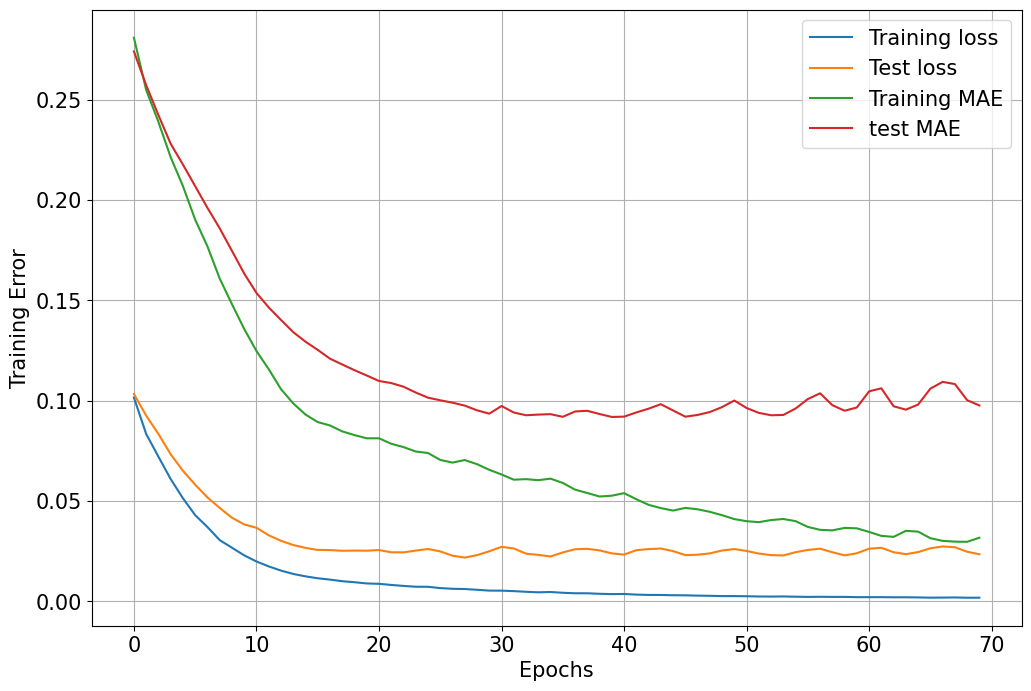

In [168]:
plt.figure(figsize=(12,8))

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.legend(['Training loss', 'Test loss', 'Training MAE', 'test MAE'], fontsize=15)

plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Training Error', fontsize=15)

plt.grid()
plt.show()

### 5.4 인공신경망 학습 결과 평가

In [169]:
# 학습결과를 확인하기 위해 model.predict(input)을 활용하여 y_predict를 추출 해 보세요.
# test, train 결과를 모두 예측해봅시다.

In [170]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

1/1 [==============================] - 0s 15ms/step


In [171]:
# train, test 결과에 대해 모두
# plot.scatter를 이용하여 x 축은 ground truth, y 축은 예측 결과를 그려보세요.
# plot.plot을 이용하여 (0,0)과 (1,1)를 지나는 선을 그려보세요. 
# 실선과 점들이 겹쳤을때 정답을 맞췄다고 손쉽게 알 수 있습니다.

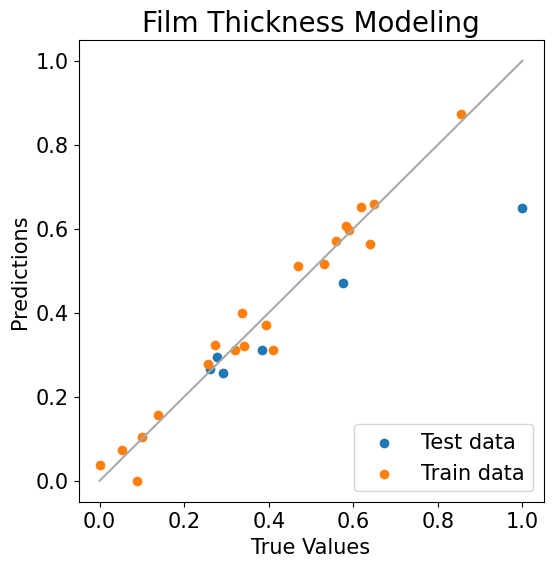

In [172]:
plt.figure(figsize=(6,6))

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.scatter(y_test, y_test_pred, label='Test data')
plt.scatter(y_train, y_train_pred, label='Train data')
plt.plot([0,1], [0,1], c = 'darkgray')

plt.title('Film Thickness Modeling', fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.legend(loc = 'lower right', fontsize=15)

plt.show()

## 6. 평가 및 예측

### 6.1 인공신경망 예측 결과 복원

In [173]:
# 지금까지 본 모든 데이터는 정규화 되어 실측치와 다른 0~1사이의 값을 갖는 값을 갖고 있었습니다.
# 정규화 수식을 역산하여 y_train과 y_test의 predict결과를 복원합니다.

In [174]:
y_test_pred_i = output_scaler.inverse_transform(y_test_pred)
y_train_pred_i = output_scaler.inverse_transform(y_train_pred)
y_test_i = output_scaler.inverse_transform(y_test.reshape(-1, 1))
y_train_i = output_scaler.inverse_transform(y_train.reshape(-1, 1))

In [175]:
# MSE, RMSE, MAE, R-2 Score 를 train 데이터에서 산출 해 봅니다.
# 스킷런에서는 rmse는 제공하지 않기 때문에 mean squared error에 root를 취하여 계산해 봅니다.
# 아래의 function을 이용하여 구합니다.
# MSE : mean_squred_error(truth, predict)
# RMSE : mean_squred_error(truth, predict)**0.5
# MSE : mean_absolute_error(truth, predict)
# r2 score : r2_score(truth, predict)

In [176]:
print("Mean squared error (MSE)_Train data :",round(mean_squared_error(y_train_i,y_train_pred_i),2))
print("Root mean squared error (RMSE)_Train data :",round(mean_squared_error(y_train_i,y_train_pred_i)**0.5,2))
print("Mean absolute error (MSE)_Train data :",round(mean_absolute_error(y_train_i,y_train_pred_i),2))
print("R2_Train data :",round(r2_score(y_train_i,y_train_pred_i),3))

Mean squared error (MSE)_Train data : 2191.28
Root mean squared error (RMSE)_Train data : 46.81
Mean absolute error (MSE)_Train data : 36.38
R2_Train data : 0.965


In [177]:
# MSE, RMSE, MAE, R-2 Score 를 Test 데이터에서도 똑같이 산출 해 봅니다.

In [178]:
print("Mean squared error (MSE)_Test data :",round(mean_squared_error(y_test_i,y_test_pred_i),2))
print("Root mean squared error (RMSE)_Test data :",round(mean_squared_error(y_test_i,y_test_pred_i)**0.5,2))
print("Mean absolute error (MSE)_Test data :",round(mean_absolute_error(y_test_i,y_test_pred_i),2))
print("R2_Test data :",round(r2_score(y_test_i,y_test_pred_i),3))

Mean squared error (MSE)_Test data : 28402.76
Root mean squared error (RMSE)_Test data : 168.53
Mean absolute error (MSE)_Test data : 107.43
R2_Test data : 0.658


### 6.2 인공신경망을 이용한 가상 계측 및 시각화

In [179]:
# 가상 계측을 위해 센서데이터의 측정값인 data/Recipe_Power_Pressure.csv을 불러옵니다.
# 불러온 데이터를 이전에 사용했던 minmax scalar을 이용하여 transform 해줍니다.

In [180]:
data_modeling_3d = pd.read_csv('data/Recipe_Power_Pressure.csv')
data_modeling_3d_s = input_scaler.transform(data_modeling_3d)

In [181]:
# normalize된 데이터와 학습된 model을 이용하여 thickness를 예측해 봅니다.
# 예측된 thickness를 inverse transform하여 실측지로 변환합니다.

In [182]:
prediction_3d = model.predict(data_modeling_3d_s)
prediction_3d_i = output_scaler.inverse_transform(prediction_3d)

3/3 [==============================] - 0s 1ms/step


In [183]:
# 예측된 결과는 plot_trisurf를 이용하여 시각화 해봅니다.

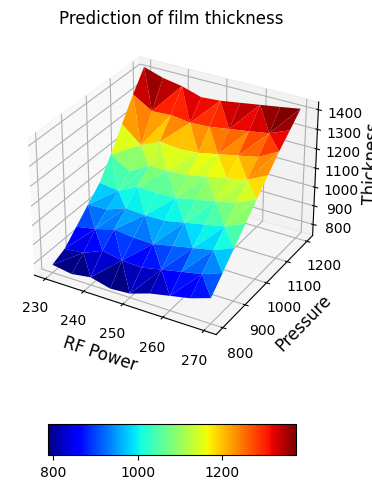

In [184]:
fig = plt.figure(figsize=(8,6))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
ax = fig.add_subplot(111, projection='3d')
data_modeling_3d = np.array(data_modeling_3d)
x = data_modeling_3d[:,0]
y = data_modeling_3d[:,1]
z = prediction_3d_i[:,0]
surf = ax.plot_trisurf(x,y,z, cmap=cm.jet)
ax.set_title("Prediction of film thickness", fontsize=12)
ax.set_xlabel("RF Power", fontsize=12)
ax.set_ylabel("Pressure", fontsize=12)
ax.set_zlabel("Thickness", fontsize=12)
fig.colorbar(surf, shrink=0.4, aspect=8,location='bottom')

## 챌린지

이번 프로젝트에서 사용한 모델은 overfiting된 결과를 보였습니다. overfitting을 막기 위해서는 어떤 기법을 사용 해야 할까요 ?